GEN = 1 58.53762561190261 [ 9 35 14 43 71  6 15  5 25 28 45 31  2  7  0 80 63 77 68 54 12  4 17 46
 51 67 36 40 39 78 52 38 37 30 84 56 29 83 33  1 10  3 16 61 24 23 18 76
 74 85 41 62 55 57 66 79 11 82 58 49 70 69 64 65 19 22 20 21 75 81 48 59
 34 27 32 87 13  8 72 60 47 53 42 44 50 86 73 26]
GEN = 2 52.75399766911162 [45 28  5 56 52 46 40 35 25 30 15  6  2  7 84 78 29 12  4 80  0 17  9 77
 31 67 38 43 54 36 37 39 63 68 51 71 14 83 33  1 10  3 16 61 24 23 18 76
 74 85 41 62 55 57 66 79 11 82 58 49 70 69 64 65 19 22 20 21 75 81 48 59
 34 27 72 26 87  8 86 32 13 73 50 53 47 44 42 60]
GEN = 3 46.2736999526185 [43 40 49 71 31 24 23 37 41 54 58 82 25 11 20 17 68 78 85  9 14  6 15  5
  2  7  0  4 36 39 38 83  1 16 76 74 66 79 69 65 19 22 21 75 81 34 42 44
 73 72  8 87 13 50 59 33 70 55 60 56 63  3 12 28 32 46 53 51 62 47 57 45
 48 18 67 77 80 84 30 10 86 35 64 52 61 26 27 29]
GEN = 4 41.933628930534155 [83 78 35 46 62 56 51 49 43 52 71 31 41 63 54 45 61 58 29 25  6 11  5  2
  9 17  1 85 15 

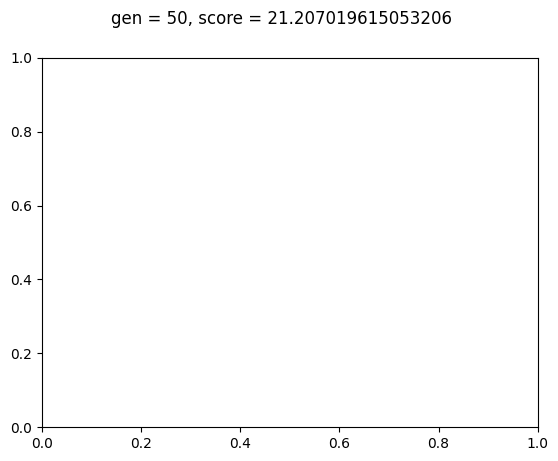

In [1]:
from google.colab import drive
import numpy as np
import os
import re
import random
import matplotlib.pyplot as plt

NODE = 88
GEN = 50
N = 800
M = 0.0001

north_east_list = []

def output_png( gene, gen, score ):
    x = []
    y = []

    path = '/content/drive/MyDrive/shikoku88/' + 'N_' + str(N) + '_GEN_' + str(GEN)
    if not os.path.isdir(path):
        os.makedirs(path)

    for i in range(NODE):
        x.append(north_east_list[gene[i]][2])
        y.append(north_east_list[gene[i]][1])
    x.append(north_east_list[gene[0]][2])
    y.append(north_east_list[gene[0]][1])

    #plt.text(35.2, 132.5, 'gen = ' +  str(gen) + ', score = ' + str(score))
    plt.suptitle('gen = ' +  str(gen) + ', score = ' + str(score))
    plt.plot(x, y)
    plt.scatter(x, y, marker='o')
    plt.savefig(path + '/' + str(gen) + '.png', format="png")
    plt.cla()
    return

def distance_p2p(x1, y1, x2, y2):
    return np.sqrt((x2-x1)*(x2-x1) + (y2-y1)*(y2-y1))

def distance_all(gene):
    ret = 0.0
    for i in range(NODE):
        x1 = north_east_list[gene[i]][2]
        y1 = north_east_list[gene[i]][1]
        x2 = north_east_list[gene[(i+1)%NODE]][2]
        y2 = north_east_list[gene[(i+1)%NODE]][1]
        ret += distance_p2p( x1, y1, x2, y2 )
    return ret

def crossover(gene_a, gene_b):
    ret_gene_list = []
    r = random.randint(1, NODE - 1)
    gene_a_1st = np.copy(gene_a[0])
    gene_a_2nd = np.copy(gene_a[0])
    gene_a_1st = gene_a_1st[:r]
    gene_a_2nd = gene_a_2nd[r:]
    gene_b_1st = np.copy(gene_b[0])
    gene_b_2nd = np.copy(gene_b[0])
    # gene_b_1stをgene_a_2ndの要素以外のデータからなるリストにする
    # gene_b_2ndをgene_a_1stの要素以外のデータからなるリストにする
    for value in gene_a_2nd:
        gene_b_1st = gene_b_1st[gene_b_1st != value]
    for value in gene_a_1st:
        gene_b_2nd = gene_b_2nd[gene_b_2nd != value]
    #gene_b_1st = gene_b_1st[:r]
    #gene_b_2nd = gene_b_2nd[r:]

    gene_new1 = np.hstack((gene_a_1st, gene_b_2nd))
    gene_new2 = np.hstack((gene_b_1st, gene_a_2nd))
    #if not check_gene(gene_new1):
    #    raise ValueError('gene_new1' + str(gene_new1))
    #if not check_gene(gene_new2):
    #    raise ValueError('gene_new2' + str(gene_new2))
    ret_gene_list.append(gene_new1)
    ret_gene_list.append(gene_new2)

    return ret_gene_list

def check_gene(gene):
    sorted_gene = [x for x in range(NODE)]
    if sorted_gene == sorted(gene):
        return True
    else:
        return False

def mutation(gene):
    r1 = random.randint(1, NODE - 1)
    r2 = random.randint(1, NODE - 1)
    ret_gene = np.copy(gene)
    ret_gene[r1], ret_gene[r2] = ret_gene[r2], ret_gene[r1]
    return ret_gene

with open('/content/drive/MyDrive/shikoku88/Fudasho88.kml', 'r', encoding='utf-8') as fr:
    for line in fr:
        m = re.search('<name>([0-9]+)番', line.strip())
        if m:
            count = int(m.group(1))
        m = re.search('<span>北緯:.*?\(([0-9.]+)\)<\/span>', line.strip())
        if m:
            north = float(m.group(1))
        m = re.search('<span>東経:.*?\(([0-9.]+)\)<\/span>', line.strip())
        if m:
            east  = float(m.group(1))
            north_east_list.append((count, north, east))

# Nだけgeneを生成
gene_list = []
gene_org = np.array([x for x in range(NODE)])
rng = np.random.default_rng()
for _ in range(N):
    gene = np.copy(gene_org)
    rng.shuffle(gene)
    gene_list.append((gene, distance_all(gene)))

for g in range(1, GEN + 1):
    print('GEN = ' + str(g), end=' ')
    # geneを交叉,突然変異
    for x in range(N):
        for y in range(N):
            new_gene_list = crossover(gene_list[x], gene_list[y])
            if random.random() < M:
                i = random.randint(0, 1)
                new_gene_list[i] = mutation(new_gene_list[i])
            for gene in new_gene_list:
                gene_list.append((gene, distance_all(gene)))

    # geneを評価(ソート)
    gene_list.sort(key=lambda x: x[1])
    del gene_list[N:]
    print(gene_list[0][1], end=' ')
    print(gene_list[0][0])
    if (g - 1) % 10 == 0:
        output_png(gene_list[0][0], g, gene_list[0][1])

print(gene_list[0])
output_png(gene_list[0][0], g, gene_list[0][1])
